In [24]:
import rasterio
from rasterio.transform import rowcol

file_path = 'DATA_SV_ver2_3/DATA_SV/Hima/B04B/2019/04/01/B04B_20190401.Z0200_TB.tif'

# Function to convert geographic coordinates to pixel coordinates
def geo_to_pixel(transform, lon, lat):
    x, y = ~transform * (lon, lat)
    return int(x), int(y)

# Open the .tif file
with rasterio.open(file_path) as dataset:
    # Extract the bounding box coordinates
    bounds = dataset.bounds
    print(f"Bounds: {bounds}")

    # Extract the coordinate reference system (CRS)
    crs = dataset.crs
    print(f"CRS: {crs}")

    # Extract the transform matrix
    transform = dataset.transform
    print(f"Transform: {transform}")

    # Extract the width and height of the dataset
    width = dataset.width
    height = dataset.height
    print(f"Width: {width}, Height: {height}")

    # Extract the coordinates of the corners
    top_left = (bounds.left, bounds.top)
    top_right = (bounds.right, bounds.top)
    bottom_left = (bounds.left, bounds.bottom)
    bottom_right = (bounds.right, bounds.bottom)
    print(f"Top Left: {top_left}")
    print(f"Top Right: {top_right}")
    print(f"Bottom Left: {bottom_left}")
    print(f"Bottom Right: {bottom_right}")

    # Coordinates of various regions
    regions_coords = {
        "Hoà Bình": {
            "north": 21.1333,
            "south": 20.3167,
            "west": 104.8000,
            "east": 105.6667
        },
        "Thanh Hoá": {
            "north": 20.6667,
            "south": 19.3000,
            "west": 104.3667,
            "east": 106.0833
        },
        "Nghệ An": {
            "north": 20,
            "south": 18.5430,
            "west": 103.8490,
            "east": 105.7970
        },
        "Hà Tĩnh": {
            "north": 18.6167,
            "south": 17.9000,
            "west": 105.1167,
            "east": 106.5000
        }
    }

    # Convert region coordinates to pixel coordinates
    regions_pixels = {}
    for region, coords in regions_coords.items():
        top_left_pixel = geo_to_pixel(transform, coords["west"], coords["north"])
        bottom_right_pixel = geo_to_pixel(transform, coords["east"], coords["south"])
        regions_pixels[region] = (top_left_pixel, bottom_right_pixel)

    for region, pixels in regions_pixels.items():
        print(f"{region} spans from pixel {pixels[0]} to {pixels[1]}")

Bounds: BoundingBox(left=101.0, bottom=17.5, right=111.0, top=21.1)
CRS: EPSG:4326
Transform: | 0.04, 0.00, 101.00|
| 0.00,-0.04, 21.10|
| 0.00, 0.00, 1.00|
Width: 250, Height: 90
Top Left: (101.0, 21.1)
Top Right: (111.0, 21.1)
Bottom Left: (101.0, 17.5)
Bottom Right: (111.0, 17.5)
Hoà Bình spans from pixel (95, 0) to (116, 19)
Thanh Hoá spans from pixel (84, 10) to (127, 45)
Nghệ An spans from pixel (71, 27) to (119, 63)
Hà Tĩnh spans from pixel (102, 62) to (137, 80)


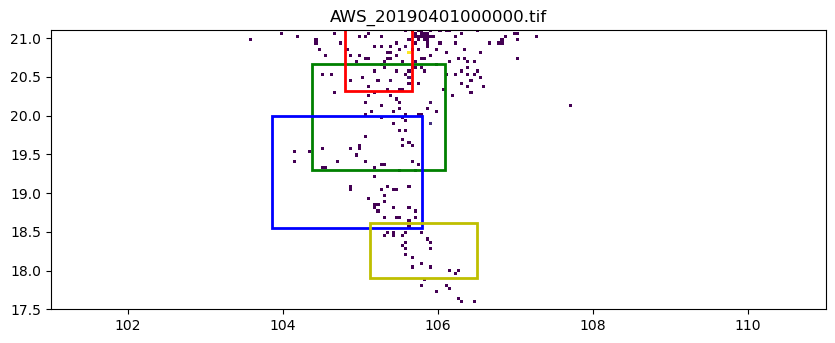

In [23]:
import os
import rasterio
from rasterio.plot import show

import matplotlib.pyplot as plt
import matplotlib.patches as patches
# Directory containing the .tif files
directory_path = 'DATA_SV_ver2_3/DATA_SV/Precipitation/AWS/2019/04/01/AWS_20190401000000.tif'
# Open the .tif file and display it
with rasterio.open(directory_path) as dataset:
    fig, ax = plt.subplots(figsize=(10, 10))
    show(dataset, ax=ax)
            # "north": 20.8260,
            # "south": 20.3170,
            # "west": 104.7710,
            # "east": 105.9290
    box = patches.Rectangle(
        xy=(104.8000, 20.3167),      # điểm bắt đầu (west, south)
        width=105.6667 - 104.8000,   # chiều rộng (east - west)
        height=21.1333 - 20.3167,    # chiều cao (north - south)
        linewidth=2,
        edgecolor='r',
        facecolor='none'
    )
    # Box for Thanh Hoá
    box_thanh_hoa = patches.Rectangle(
        xy=(104.3667, 19.3000),      # điểm bắt đầu (west, south)
        width=106.0833 - 104.3667,   # chiều rộng (east - west)
        height=20.6667 - 19.3000,    # chiều cao (north - south)
        linewidth=2,
        edgecolor='g',
        facecolor='none'
    )
    ax.add_patch(box_thanh_hoa)

    # Box for Nghệ An
    box_nghe_an = patches.Rectangle(
        xy=(103.8490, 18.5430),      # điểm bắt đầu (west, south)
        width=105.7970 - 103.8490,   # chiều rộng (east - west)
        height=20 - 18.5430,    # chiều cao (north - south)
        linewidth=2,
        edgecolor='b',
        facecolor='none'
    )
    ax.add_patch(box_nghe_an)

    # Box for Hà Tĩnh
    box_ha_tinh = patches.Rectangle(
        xy=(105.1167, 17.9000),      # điểm bắt đầu (west, south)
        width=106.5000 - 105.1167,   # chiều rộng (east - west)
        height=18.6167 - 17.9000,    # chiều cao (north - south)
        linewidth=2,
        edgecolor='y',
        facecolor='none'
    )
    ax.add_patch(box_ha_tinh)
    ax.add_patch(box)
    ax.set_title(os.path.basename(directory_path))
    plt.show()

